## **1. Data Loading & Description**

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeCV
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import csv
from scipy.stats import randint
from scipy.stats import uniform

c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
churn = pd.read_csv('cleaned_churn_data_imputasi.csv', sep=',')
churn

,LOS_GROUP,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,USAGE_INET,USAGE_INET_FUP,...,FREQ_TRX,JHARI_ADDON,FREQ_PSADDON,JHARI_PAY,FREQ_ONTIME,JHARI_GGN,FREQ_GGN,JHARI_USAGE,FREQ_USAGE,IS_CHURN
0,2.0,54.451613,54.451613,5.0,1.0,1.0,0.0,30720.0,287267038.0,1.006862e+09,...,0.0,305.0,0.0,8899.0,3.0,386.759821,0.0,18.000000,3.0,0.0
1,2.0,29.225806,29.225806,4.0,1.0,0.0,0.0,20480.0,43884331.0,2.097152e+08,...,0.0,563.0,0.0,8900.0,4.0,563.000000,0.0,37.926371,0.0,0.0
2,2.0,53.741935,53.741935,6.0,1.0,0.0,0.0,40960.0,344170514.0,1.228693e+09,...,0.0,1656.0,0.0,8909.0,5.0,1365.000000,0.0,18.000000,3.0,0.0
3,2.0,47.000000,47.000000,2.0,1.0,0.0,0.0,30720.0,239919789.0,1.001246e+09,...,0.0,1004.0,0.0,8900.0,5.0,300.000000,0.0,18.000000,3.0,0.0
4,2.0,33.967742,33.967742,5.0,1.0,0.0,0.0,30720.0,272165384.0,1.010684e+09,...,0.0,368.0,0.0,8896.0,0.0,210.000000,0.0,18.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,48.709677,48.709677,1.0,1.0,0.0,0.0,30720.0,247940065.0,1.008979e+09,...,0.0,907.0,0.0,8902.0,4.0,1197.000000,0.0,18.000000,3.0,0.0
1048571,2.0,6.580645,6.580645,7.0,1.0,0.0,0.0,51200.0,302402479.0,1.585034e+09,...,0.0,219.0,0.0,8897.0,4.0,337.454408,0.0,18.000000,3.0,0.0
1048572,2.0,10.903226,10.903226,5.0,1.0,1.0,0.0,30720.0,2834800.0,1.153434e+09,...,10.0,92.0,6.0,8902.0,5.0,484.418683,0.0,2.000000,3.0,0.0
1048573,1.0,5.419355,5.419355,5.0,1.0,0.0,0.0,30720.0,557241059.0,1.300477e+08,...,4.0,184.0,0.0,8896.0,1.0,295.056296,0.0,18.000000,3.0,0.0


In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 63 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   LOS_GROUP           1048575 non-null  float64
 1   LOS_CUST_           1048575 non-null  float64
 2   JTAG                1048575 non-null  float64
 3   DIVRE_ID            1048575 non-null  float64
 4   IS_FIBER            1048575 non-null  float64
 5   TOTAL_MINIPACK      1048575 non-null  float64
 6   TOTAL_STB_TAMBAHAN  1048575 non-null  float64
 7   SPEED               1048575 non-null  float64
 8   USAGE_INET          1048575 non-null  float64
 9   USAGE_INET_FUP      1048575 non-null  float64
 10  RATIO_USAGE         1048575 non-null  float64
 11  GR_USAGE            1048575 non-null  float64
 12  USAGE_USEETV        1048575 non-null  float64
 13  USAGE_POTS_OUT      1048575 non-null  float64
 14  USAGE_POTS_IN       1048575 non-null  float64
 15  REV_ARPU       

## **2. Preprocessing Data**

### Data Balancing

In [10]:
# Hitung jumlah churn dan non-churn
churn['IS_CHURN'].value_counts()

IS_CHURN
0.0    978375
1.0     70200
Name: count, dtype: int64

In [11]:
# X = new_churn.drop(['IS_CHURN', 'LOS_GROUP', 'PAYMENT_METHOD', 'KAT_HVC_NEW'], axis=1)
# y = new_churn['IS_CHURN']

In [12]:
# smote = SMOTEENN()
# X_resampled, y_resampled = smote.fit_resample(X_new, y)

# print("The new data contains {} rows".format(X_resampled.shape[0]))

In [13]:
# y_resampled.value_counts()

In [14]:
# # Hitung distribusi dari nilai y_resampled
# y_counts = y_resampled.value_counts()

# # Buat pie chart berdasarkan distribusi y_resampled
# plt.pie(
#     y_counts, 
#     labels=['Not-Churn Customer', 'Churn Customer'], 
#     autopct='%1.1f%%', 
#     startangle=90, 
#     colors=['#FF5733', 'yellow'], 
#     explode=(0, 0.1)
# )

# # Tambahkan judul
# plt.title('Churn - Not-Churn %')

# # Tampilkan plot
# plt.show()

### Data Splitting

In [15]:
X = churn.drop(['IS_CHURN'], axis=1)
y = churn['IS_CHURN']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734002, 62), (314573, 62), (734002,), (314573,))

### Data Scaling

In [18]:
X_train.describe()

,LOS_GROUP,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,USAGE_INET,USAGE_INET_FUP,...,JHARI_TRX,FREQ_TRX,JHARI_ADDON,FREQ_PSADDON,JHARI_PAY,FREQ_ONTIME,JHARI_GGN,FREQ_GGN,JHARI_USAGE,FREQ_USAGE
count,734002.000000,7.340020e+05,7.340020e+05,734002.000000,734002.0,734002.000000,734002.000000,734002.000000,7.340020e+05,7.340020e+05,...,734002.000000,734002.000000,734002.000000,734002.000000,734002.000000,734002.000000,734002.000000,734002.000000,734002.000000,734002.000000
mean,1.890067,1.610790e+07,1.186467e+07,3.691204,1.0,0.158267,0.010143,29946.135733,2.656609e+08,8.175318e+08,...,307.594696,1.103350,620.442465,0.212343,8875.705667,2.288734,362.153738,0.397587,20.774794,2.481708
std,0.331049,8.582660e+07,7.723895e+07,2.037674,0.0,0.511812,0.104773,12796.381358,2.119030e+08,4.332906e+08,...,411.633332,2.090489,491.534390,0.740480,488.612066,1.720705,247.975994,0.979034,7.863606,0.923264
min,0.017807,1.029032e+00,1.029032e+00,1.000000,1.0,0.000000,0.000000,5120.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-161.635976,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.138710e+01,1.119355e+01,2.000000,1.0,0.000000,0.000000,20480.000000,1.339312e+08,4.457074e+08,...,134.000000,0.000000,279.000000,0.000000,8899.000000,1.000000,185.000000,0.000000,18.000000,2.000000
50%,2.000000,2.680645e+01,2.661290e+01,4.000000,1.0,0.000000,0.000000,30720.000000,2.283671e+08,1.004453e+09,...,277.000000,0.000000,575.000000,0.000000,8899.000000,2.000000,363.994089,0.000000,18.000000,3.000000
75%,2.000000,4.148387e+01,4.119355e+01,5.000000,1.0,0.000000,0.000000,30720.000000,3.519356e+08,1.044818e+09,...,371.000000,1.000000,824.000000,0.000000,8900.000000,4.000000,460.118039,0.000000,20.000000,3.000000
max,2.000000,9.935484e+08,9.935484e+08,7.000000,1.0,15.000000,2.000000,102400.000000,4.294967e+09,4.246733e+09,...,6770.000000,42.000000,5912.000000,24.000000,39809.000000,6.000000,1486.000000,57.000000,80.000000,3.000000


In [19]:
# Buat objek StandardScaler
scaler = StandardScaler()

# Fit dan transform data training
X_train = scaler.fit_transform(X_train)

# Transform data testing
X_test = scaler.transform(X_test)

In [20]:
# Hitung rata-rata dan standar deviasi dari data training
mean = X_train.mean()
std = X_train.std()

# Hitung Z-score untuk data training
X_train = (X_train - mean) / std

# Hitung Z-score untuk data testing menggunakan mean dan std dari data training
X_test = (X_test - mean) / std

## **3. Build Model**

In [ ]:
# Fungsi untuk mencetak laporan klasifikasi, akurasi, confusion matrix, AUC & ROC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Classification report:\n', metrics.classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot();
    
    # Menghitung AUC & ROC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print('AUC:', roc_auc)
        
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        print('AUC:', roc_auc)
        
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support predict_proba method.")

# def evaluate_models(models, X_test, y_test):
#     plt.figure()
    
#     for model_name, model in models.items():
#         y_pred = model.predict(X_test)
#         print(f'Classification report for {model_name}:\n', metrics.classification_report(y_test, y_pred))
#         print(f'Accuracy for {model_name}:', metrics.accuracy_score(y_test, y_pred))
#         print(f'Confusion Matrix for {model_name}:\n', metrics.confusion_matrix(y_test, y_pred))
        
#         if hasattr(model, "predict_proba"):
#             y_pred_proba = model.predict_proba(X_test)[:,1]
#             fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#             roc_auc = roc_auc_score(y_test, y_pred_proba)
#         elif hasattr(model, "decision_function"):
#             y_scores = model.decision_function(X_test)
#             fpr, tpr, _ = roc_curve(y_test, y_scores)
#             roc_auc = roc_auc_score(y_test, y_scores)
#         else:
#             print(f"Model {model_name} does not support predict_proba or decision_function method.")
#             continue
        
#         plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     plt.show()

In [28]:
# models = {
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'LogisticRegression':LogisticRegression(random_state=123),
#     'RidgeCV': RidgeClassifier(),
#     'XG Boost': XGBClassifier(),
#     'Catboost': CatBoostClassifier(verbose=0),
#     'Light GBM': LGBMClassifier(),
#     'KNN': KNeighborsClassifier(n_neighbors=3)
# }

# # Melatih dan mengevaluasi model
# for model in models.values():
#     model.fit(X_train, y_train)

# evaluate_models(models, X_test, y_test)

### Decision Tree

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    293569
         1.0       0.16      0.19      0.18     21004

    accuracy                           0.88    314573
   macro avg       0.55      0.56      0.56    314573
weighted avg       0.89      0.88      0.88    314573

Accuracy: 0.8793475600258127


<Figure size 200x200 with 0 Axes>

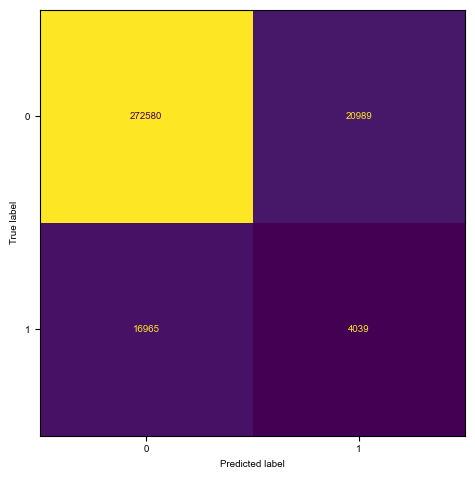

AUC: 0.5604003684048304


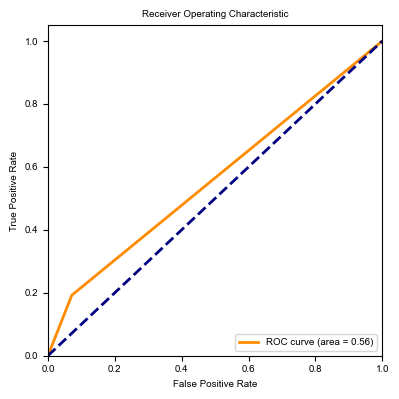

In [24]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
evaluate_model(dtree, X_test, y_test)

In [ ]:
# Hyperparameter Tuning
# Randomized Search
param_dist = {'max_depth': randint(1,20), 'min_samples_split': randint(2,20)}
dt = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)
best_dt = rand_search.best_estimator_
print('Best hyperparameters for Decision Tree:', rand_search.best_params_)

# Grid Search
parameters = {'max_depth': range(5,20,5), 'min_samples_split': range(2,20,5)}
grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97    293457
         1.0       0.64      0.02      0.04     21116

    accuracy                           0.93    314573
   macro avg       0.78      0.51      0.50    314573
weighted avg       0.91      0.93      0.90    314573

Accuracy: 0.9334335750366369
Confusion Matrix:
 [[293220    237]
 [ 20703    413]]
AUC: 0.7149250863808567


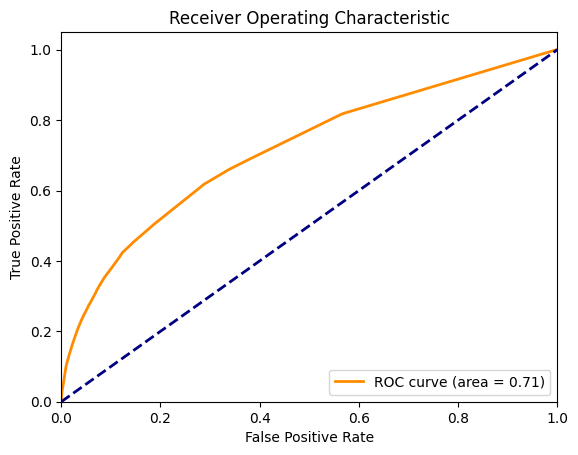

In [ ]:
y_pred = best_dt.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_dt, "predict_proba"):
  y_pred_proba = best_dt.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

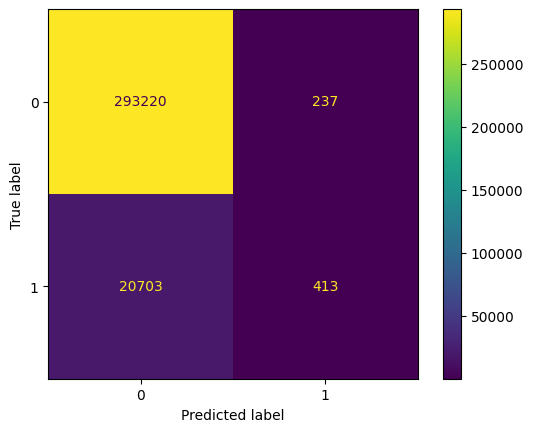

In [ ]:
# Generate predictions with the best model
y_pred = best_dt.predict(X_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# target_names = ['class 0', 'class 1']

# def classifaction_report_csv(report):
#     report_data = []
#     lines = report.split('\n')
#     for line in lines[2:-3]:
#         row = {}
#         row_data = line.split('      ')
#         row['class'] = row_data[0]
#         row['precision'] = float(row_data[1])
#         row['recall'] = float(row_data[2])
#         row['f1_score'] = float(row_data[3])
#         row['support'] = float(row_data[4])
#         report_data.append(row)
#     dataframe = pd.DataFrame.from_dict(report_data)
#     dataframe.to_csv('report_mnist.csv', index = False)

# #call the classification_report first and then our new function

# report = classification_report(y_test, y_pred, target_names=target_names)
# classifaction_report_csv(report)

### Random Forest

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    293494
         1.0       0.73      0.05      0.09     21079

    accuracy                           0.94    314573
   macro avg       0.83      0.52      0.53    314573
weighted avg       0.92      0.94      0.91    314573

Accuracy: 0.9350897883798037
AUC: 0.7311605843133865


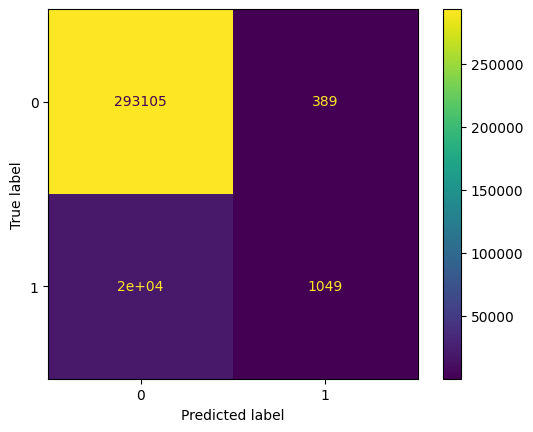

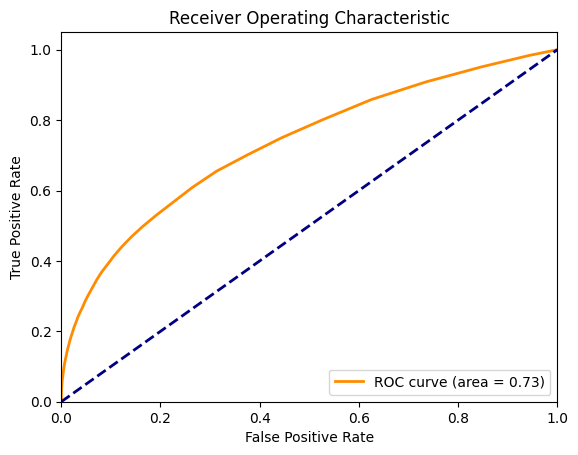

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

In [ ]:
# Hyperparameter Tuning
# Randomized Search
param_dist = {'n_estimators': randint(10,500),
              'max_depth': randint(1,20)}
# Create a random forest classifier
rf = RandomForestClassifier()
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)
# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Grid Search
parameters = {'n_estimators':range(15,50,15), 'max_depth':range(5,20,5)}
grid_search = GridSearchCV(rf,
                                 parameters,
                                 cv=5)
grid_search.fit(X_train, y_train)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 164}


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 20, 5),
                         'n_estimators': range(15, 50, 15)})

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_rf_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97    293457
         1.0       0.76      0.03      0.05     21116

    accuracy                           0.93    314573
   macro avg       0.85      0.51      0.51    314573
weighted avg       0.92      0.93      0.90    314573

Accuracy: 0.9340439262110861
Confusion Matrix:
 [[293292    165]
 [ 20583    533]]
AUC: 0.7467503846503531


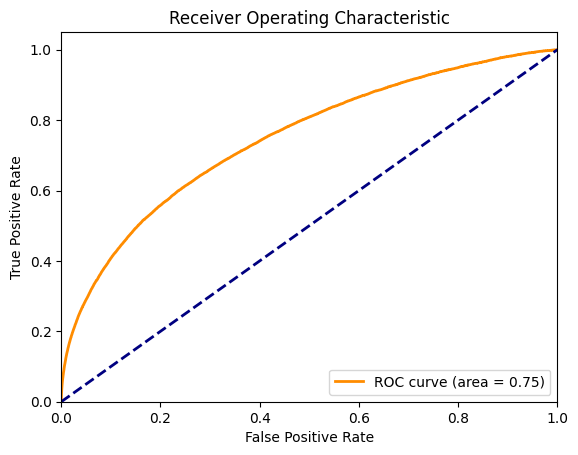

In [ ]:
y_pred = best_rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_rf, "predict_proba"):
  y_pred_proba = best_rf.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

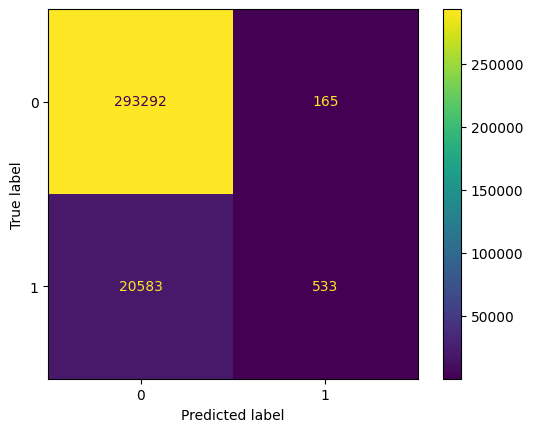

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Logistic Regression

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    293494
         1.0       0.36      0.01      0.02     21079

    accuracy                           0.93    314573
   macro avg       0.65      0.50      0.49    314573
weighted avg       0.90      0.93      0.90    314573

Accuracy: 0.9323908917802863
AUC: 0.7063059452484167


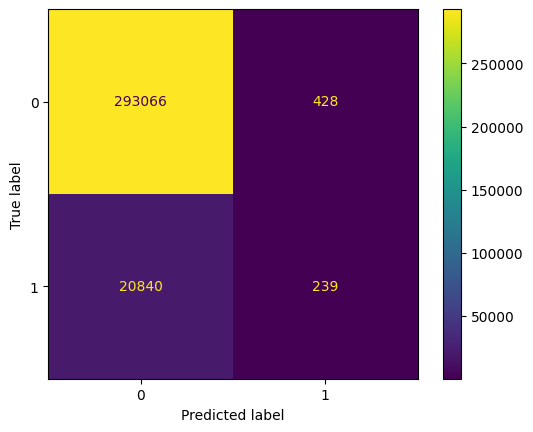

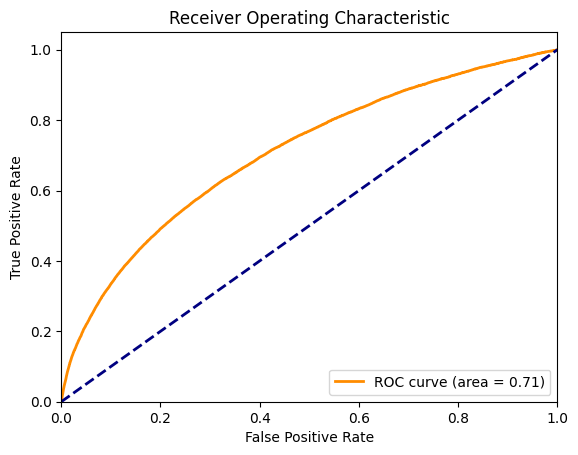

In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
evaluate_model(logreg, X_test, y_test)

In [ ]:
# Random search for Logistic Regression
param_dist = {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression(solver='saga', max_iter=5000)
rand_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_lr.fit(X_train, y_train)
best_lr = rand_search_lr.best_estimator_
print('Best hyperparameters for Logistic Regression:', rand_search_lr.best_params_)

# Grid search for Logistic Regression
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(lr, parameters, cv=5)
grid_search_lr.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_lr_churn.csv', index = False, header=True)

In [ ]:
y_pred = best_lr.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_lr, "predict_proba"):
  y_pred_proba = best_lr.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_lr.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Ridge Classifier

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97    293494
         1.0       0.41      0.00      0.00     21079

    accuracy                           0.93    314573
   macro avg       0.67      0.50      0.48    314573
weighted avg       0.90      0.93      0.90    314573

Accuracy: 0.9329567381815985
AUC: 0.705507691133166


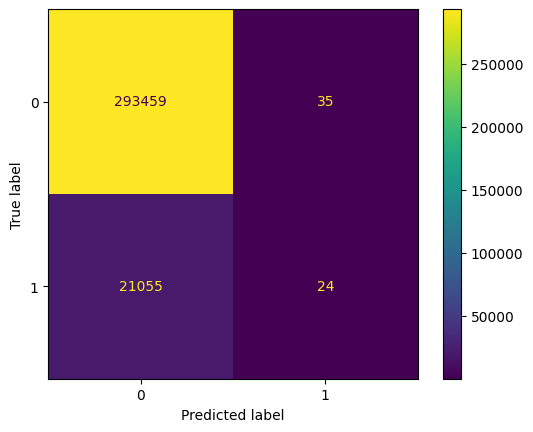

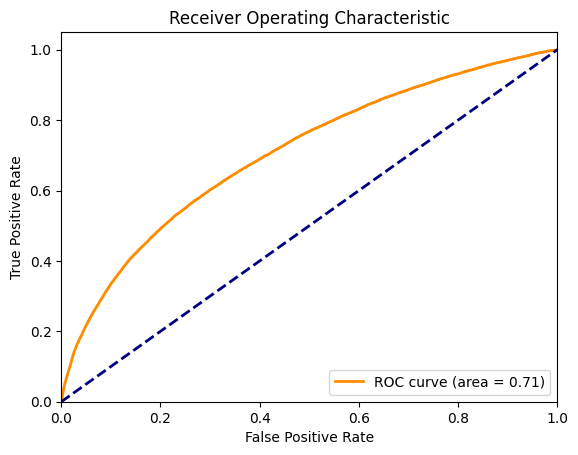

In [ ]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test)

In [ ]:
# Random search for Ridge Classifier
param_dist = {'alpha': uniform(0.1, 10)}
ridge = RidgeClassifier()
rand_search_ridge = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_ridge.fit(X_train, y_train)
best_ridge = rand_search_ridge.best_estimator_
print('Best hyperparameters for Ridge Classifier:', rand_search_ridge.best_params_)

# Grid search for Ridge Classifier
parameters = {'alpha': [0.1, 1, 10]}
grid_search_ridge = GridSearchCV(ridge, parameters, cv=5)
grid_search_ridge.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_ridge_churn.csv', index = False, header=True)

In [ ]:
y_pred = best_ridge.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_ridge, "predict_proba"):
  y_pred_proba = best_ridge.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_ridge.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### XG Boost

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    293494
         1.0       0.64      0.08      0.14     21079

    accuracy                           0.94    314573
   macro avg       0.79      0.54      0.55    314573
weighted avg       0.92      0.94      0.91    314573

Accuracy: 0.9352233026992145
AUC: 0.771217535504116


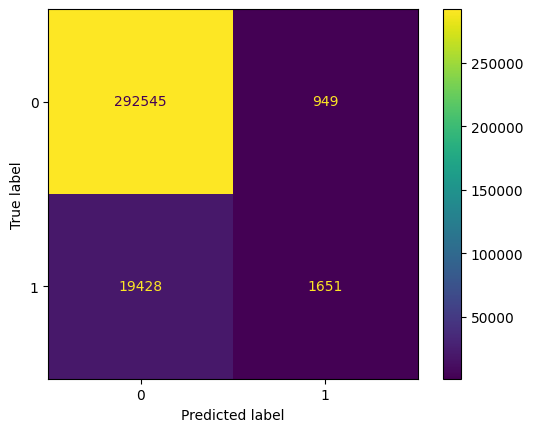

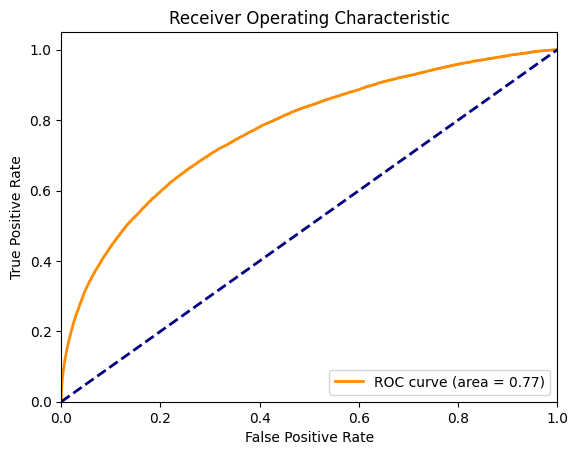

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

In [ ]:
# Random search for XGBoost
param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
xgb = XGBClassifier()
rand_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_xgb.fit(X_train, y_train)
best_xgb = rand_search_xgb.best_estimator_
print('Best hyperparameters for XGBoost:', rand_search_xgb.best_params_)

# Grid search for XGBoost
parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
grid_search_xgb = GridSearchCV(xgb, parameters, cv=5)
grid_search_xgb.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_xgb_churn.csv', index = False, header=True)

In [ ]:
y_pred = best_xgb.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_xgb, "predict_proba"):
  y_pred_proba = best_xgb.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_xgb.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Cat Boost

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    293494
         1.0       0.67      0.09      0.17     21079

    accuracy                           0.94    314573
   macro avg       0.81      0.55      0.57    314573
weighted avg       0.92      0.94      0.91    314573

Accuracy: 0.9362564492184644
AUC: 0.7809675245523917


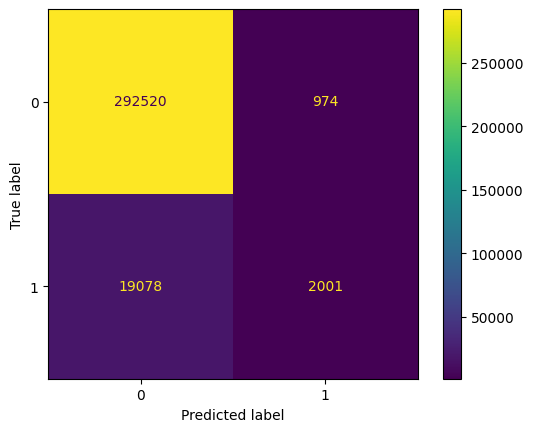

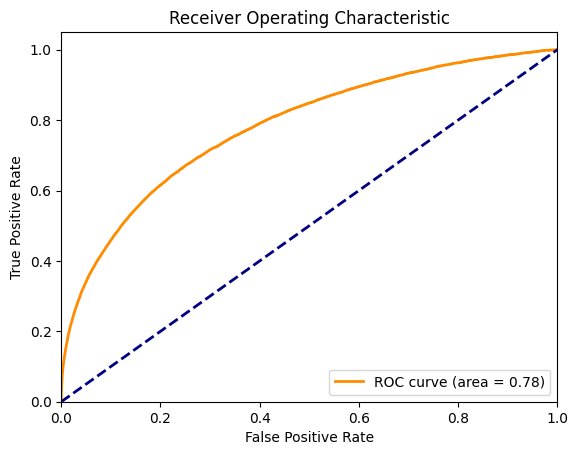

In [ ]:
catboost = CatBoostClassifier(verbose=0)  # verbose=0 untuk menonaktifkan output selama pelatihan
catboost.fit(X_train, y_train)
evaluate_model(catboost, X_test, y_test)

In [ ]:
# Random search for CatBoost
param_dist = {'iterations': randint(10,500), 'depth': randint(1,10)}
catboost = CatBoostClassifier(verbose=0)
rand_search_catboost = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_catboost.fit(X_train, y_train)
best_catboost = rand_search_catboost.best_estimator_
print('Best hyperparameters for CatBoost:', rand_search_catboost.best_params_)

# Grid search for CatBoost
parameters = {'iterations': range(50,200,50), 'depth': range(3,10,2)}
grid_search_catboost = GridSearchCV(catboost, parameters, cv=5)
grid_search_catboost.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_catboost_churn.csv', index = False, header=True)

In [ ]:
y_pred = best_catboost.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_catboost, "predict_proba"):
  y_pred_proba = best_catboost.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_catboost.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Light GBM

[LightGBM] [Info] Number of positive: 49121, number of negative: 684881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8330
[LightGBM] [Info] Number of data points in the train set: 734002, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066922 -> initscore=-2.634958
[LightGBM] [Info] Start training from score -2.634958
Classification report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    293494
         1.0       0.68      0.06      0.11     21079

    accuracy                           0.94    314573
   macro avg       0.81      0.53      0.54    314573
weighted avg       0.92      0.94      0.91    314573

Accuracy: 0.9351279353282068
AUC: 0.7692144789673782


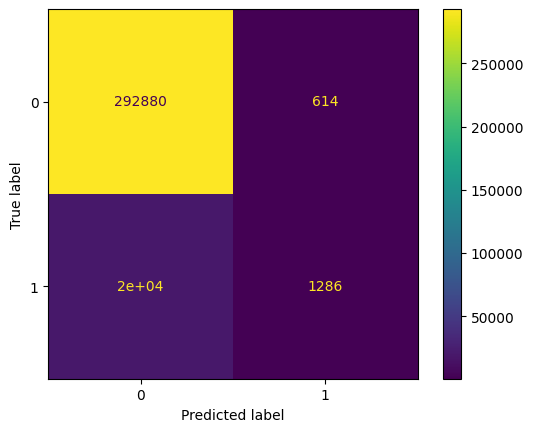

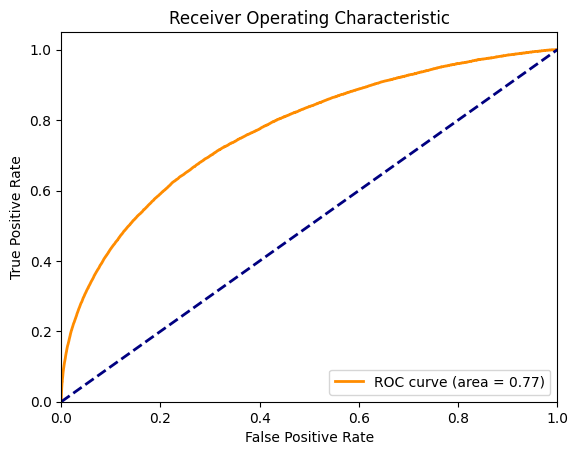

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test)

In [ ]:
# Random search for LightGBM
param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
lgbm = LGBMClassifier()
rand_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_lgbm.fit(X_train, y_train)
best_lgbm = rand_search_lgbm.best_estimator_
print('Best hyperparameters for LightGBM:', rand_search_lgbm.best_params_)

# Grid search for LightGBM
parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
grid_search_lgbm = GridSearchCV(lgbm, parameters, cv=5)
grid_search_lgbm.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_lgbm_churn.csv', index = False, header=True)

In [ ]:
y_pred = best_lgbm.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_lgbm, "predict_proba"):
  y_pred_proba = best_lgbm.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_lgbm.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### KNN

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96    293494
         1.0       0.25      0.08      0.12     21079

    accuracy                           0.92    314573
   macro avg       0.59      0.53      0.54    314573
weighted avg       0.89      0.92      0.90    314573

Accuracy: 0.9226793144993372
AUC: 0.5741084711169341


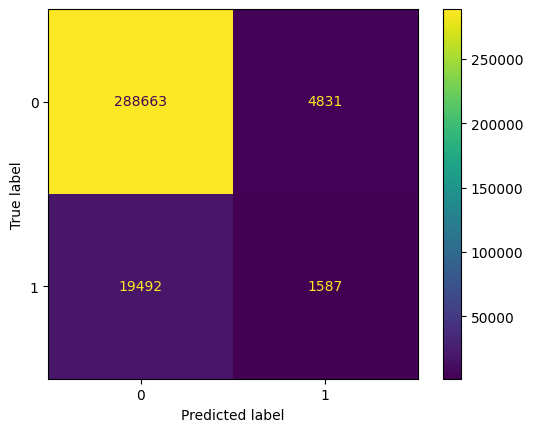

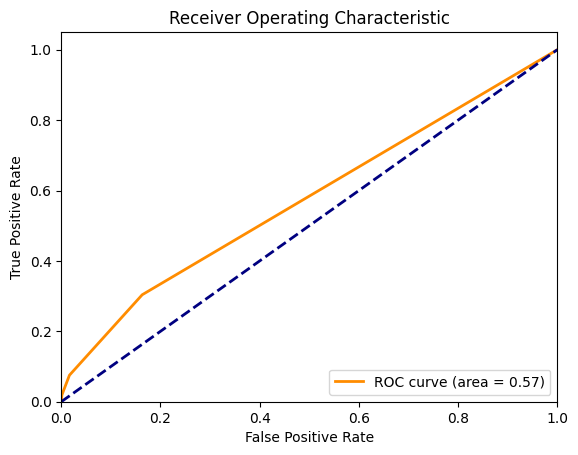

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

In [ ]:
# Random search for KNN
param_dist = {'n_neighbors': randint(1,30), 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
rand_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_knn.fit(X_train, y_train)
best_knn = rand_search_knn.best_estimator_
print('Best hyperparameters for KNN:', rand_search_knn.best_params_)

# Grid search for KNN
parameters = {'n_neighbors': range(1,30,5), 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, parameters, cv=5)
grid_search_knn.fit(X_train, y_train)

In [ ]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_knn_churn.csv', index = False, header=True)

In [ ]:
y_pred = best_knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_knn, "predict_proba"):
  y_pred_proba = best_knn.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Generate predictions with the best model
y_pred = best_knn.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82    193074
         1.0       0.86      0.89      0.87    254967

    accuracy                           0.85    448041
   macro avg       0.85      0.85      0.85    448041
weighted avg       0.85      0.85      0.85    448041



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90    193074
         1.0       0.95      0.89      0.92    254967

    accuracy                           0.91    448041
   macro avg       0.91      0.91      0.91    448041
weighted avg       0.91      0.91      0.91    448041



In [ ]:
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.65      0.81      0.72    193074
         1.0       0.82      0.66      0.73    254967

    accuracy                           0.73    448041
   macro avg       0.73      0.74      0.73    448041
weighted avg       0.75      0.73      0.73    448041



In [ ]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('Classification report for Ridge Classifier:\n', metrics.classification_report(y_test, y_pred_ridge))

Classification report for Ridge Classifier:
               precision    recall  f1-score   support

         0.0       0.64      0.84      0.73    193074
         1.0       0.84      0.64      0.73    254967

    accuracy                           0.73    448041
   macro avg       0.74      0.74      0.73    448041
weighted avg       0.76      0.73      0.73    448041



In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Classification report for XGBoost:\n', metrics.classification_report(y_test, y_pred_xgb))

Classification report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.74      0.87      0.80    193074
         1.0       0.89      0.77      0.82    254967

    accuracy                           0.81    448041
   macro avg       0.81      0.82      0.81    448041
weighted avg       0.82      0.81      0.81    448041



In [ ]:
catboost = CatBoostClassifier(verbose=0)  # verbose=0 untuk menonaktifkan output selama pelatihan
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
print('Classification report for CatBoost:\n', metrics.classification_report(y_test, y_pred_catboost))

Classification report for CatBoost:
               precision    recall  f1-score   support

         0.0       0.75      0.88      0.81    193074
         1.0       0.90      0.78      0.84    254967

    accuracy                           0.82    448041
   macro avg       0.82      0.83      0.82    448041
weighted avg       0.83      0.82      0.83    448041



In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print('Classification report for LightGBM:\n', metrics.classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 594823, number of negative: 450603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3147
[LightGBM] [Info] Number of data points in the train set: 1045426, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568977 -> initscore=0.277677
[LightGBM] [Info] Start training from score 0.277677
Classification report for LightGBM:
               precision    recall  f1-score   support

         0.0       0.75      0.91      0.82    193074
         1.0       0.92      0.77      0.84    254967

    accuracy                           0.83    448041
   macro avg       0.83      0.84      0.83    448041
weighted avg       0.84      0.83      0.83    448041



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86    193074
         1.0       0.87      0.95      0.91    254967

    accuracy                           0.89    448041
   macro avg       0.90      0.88      0.88    448041
weighted avg       0.89      0.89      0.89    448041

